# Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pandas_visual_analysis import VisualAnalysis, DataSource
import os

# # Read in the csv file and display some of the basic info

In [2]:
#sales=pd.read_csv(os.path.dirname(os.path.abspath(__file__))+'/sample-salesv2.csv',parse_dates=['date'])

sales=pd.read_csv('sample-salesv2.csv',parse_dates=['date'])
sales.tail()

,account number,name,sku,category,quantity,unit price,ext price,date
995,758133,"Kihn, McClure and Denesik",WJ-02096,Belt,11,60.50,665.50,2014-08-03 10:39:00
996,850140,Kunze Inc,GS-86623,Shoes,16,19.66,314.56,2014-05-03 21:18:00
997,93356,Waters-Walker,GS-86623,Shoes,13,90.95,1182.35,2014-06-14 12:43:00
998,304860,Huel-Haag,LL-46261,Shoes,9,98.22,883.98,2014-07-26 01:10:00
999,98022,Heidenreich-Bosco,LW-86841,Shoes,14,74.83,1047.62,2014-06-27 05:58:00


In [3]:
#VisualAnalysis(sales)

In [4]:
print("Data types in the file:")
print(sales.dtypes)

Data types in the file:
account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   account number  1000 non-null   int64         
 1   name            1000 non-null   object        
 2   sku             1000 non-null   object        
 3   category        1000 non-null   object        
 4   quantity        1000 non-null   int64         
 5   unit price      1000 non-null   float64       
 6   ext price       1000 non-null   float64       
 7   date            1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 62.6+ KB


In [6]:
print("Summary of the input file:") 
print(sales.describe()) #best!!

Summary of the input file:
       account number     quantity   unit price   ext price
count     1000.000000  1000.000000  1000.000000  1000.00000
mean    535208.897000    10.328000    56.179630   579.84390
std     277589.746014     5.687597    25.331939   435.30381
min      93356.000000     1.000000    10.060000    10.38000
25%     299771.000000     5.750000    35.995000   232.60500
50%     563905.000000    10.000000    56.765000   471.72000
75%     750461.000000    15.000000    76.802500   878.13750
max     995267.000000    20.000000    99.970000  1994.80000


In [7]:
print(sales.describe(include='all'))#,datetime_is_numeric=True)) #TEST?

        account number                           name       sku category  \
count      1000.000000                           1000      1000     1000   
unique             NaN                             20        10        3   
top                NaN  Senger, Upton and Breitenberg  QN-82852    Shirt   
freq               NaN                             59       109      404   
first              NaN                            NaN       NaN      NaN   
last               NaN                            NaN       NaN      NaN   
mean     535208.897000                            NaN       NaN      NaN   
std      277589.746014                            NaN       NaN      NaN   
min       93356.000000                            NaN       NaN      NaN   
25%      299771.000000                            NaN       NaN      NaN   
50%      563905.000000                            NaN       NaN      NaN   
75%      750461.000000                            NaN       NaN      NaN   
max      995

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


In [8]:
print("Basic unit price stats:")
prices = list(sales['unit price']) #.unique())#describe()
prices[::100]

Basic unit price stats:


[44.48, 44.1, 40.29, 80.25, 12.27, 88.32, 28.32, 54.79, 88.36, 58.12]

In [9]:
# Filter the columns down to the ones we need to look at for customer sales

customers = sales[['name','ext price','date']]
customers[::100]

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:00
100,Gorczany-Hahn,88.20,2014-08-09 18:31:00
200,Kunze Inc,523.77,2014-09-01 23:53:00
300,Gorczany-Hahn,963.00,2013-11-06 05:25:00
400,"Senger, Upton and Breitenberg",134.97,2014-01-15 07:26:00
500,Cole-Eichmann,1413.12,2014-06-17 22:27:00
600,Carroll PLC,226.56,2014-10-01 04:15:00
700,Hegmann and Sons,602.69,2014-05-20 14:10:00
800,Waelchi-Fahey,883.60,2014-08-24 23:09:00
900,Huel-Haag,290.60,2014-08-02 12:08:00


In [10]:
#unique(), set()

#list(set(sales['name']))

list(sales['name'].unique())

#len(sales['name'].unique())  #duplicated??

['Carroll PLC',
 'Heidenreich-Bosco',
 'Kerluke, Reilly and Bechtelar',
 'Waters-Walker',
 'Waelchi-Fahey',
 'Cole-Eichmann',
 'Hegmann and Sons',
 'Senger, Upton and Breitenberg',
 'Kihn, McClure and Denesik',
 'Ernser, Cruickshank and Lind',
 'Koelpin PLC',
 'Volkman, Goyette and Lemke',
 'Berge LLC',
 'Huel-Haag',
 'Kunze Inc',
 'Gorczany-Hahn',
 'Kilback-Gerlach',
 'Hamill-Hackett',
 'Davis, Kshlerin and Reilly',
 'Kuphal, Zieme and Kub']

In [11]:
sales['name'].value_counts()
#c ?

Senger, Upton and Breitenberg    59
Hegmann and Sons                 58
Kihn, McClure and Denesik        58
Carroll PLC                      57
Waelchi-Fahey                    54
Kunze Inc                        54
Koelpin PLC                      53
Berge LLC                        52
Kuphal, Zieme and Kub            52
Kerluke, Reilly and Bechtelar    52
Cole-Eichmann                    51
Waters-Walker                    50
Volkman, Goyette and Lemke       48
Ernser, Cruickshank and Lind     47
Kilback-Gerlach                  45
Hamill-Hackett                   44
Huel-Haag                        43
Gorczany-Hahn                    42
Davis, Kshlerin and Reilly       41
Heidenreich-Bosco                40
Name: name, dtype: int64

In [12]:
sales['category'].unique()

array(['Belt', 'Shoes', 'Shirt'], dtype=object)

### Contains, startswith, match, fullmatch 

In [13]:
#contains

customers[customers['name'].str.contains('C')][::100]   #[A-Za-z]
#customers[customers['name'].str.contains(r'C$')][::10]

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:00
317,Berge LLC,704.10,2014-05-23 13:09:00
632,Koelpin PLC,1445.71,2014-08-04 04:24:00
949,Cole-Eichmann,1751.94,2014-01-16 12:27:00


In [14]:
customers[customers['name'].str.contains('ll',case=True)][::25]  #like '%'  (r'll'i)

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:00
125,Hamill-Hackett,549.80,2014-07-02 12:51:00
245,Hamill-Hackett,370.10,2013-11-10 07:30:00
361,"Davis, Kshlerin and Reilly",1011.14,2013-11-30 17:23:00
446,"Davis, Kshlerin and Reilly",259.64,2014-02-20 20:48:00
562,"Kerluke, Reilly and Bechtelar",58.30,2013-12-29 06:05:00
729,"Kerluke, Reilly and Bechtelar",501.60,2013-11-27 21:04:00
885,Carroll PLC,171.28,2014-09-11 18:45:00


In [15]:
customers[customers['name'].str.contains('ll',case=False)][::25]

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:00
96,Carroll PLC,554.05,2014-03-07 09:38:00
207,"Davis, Kshlerin and Reilly",198.09,2014-04-08 03:17:00
292,Berge LLC,124.64,2014-03-12 11:38:00
368,"Kerluke, Reilly and Bechtelar",1242.40,2014-07-01 22:14:00
445,Carroll PLC,805.76,2014-01-03 07:56:00
536,"Davis, Kshlerin and Reilly",932.10,2014-07-08 01:00:00
655,Carroll PLC,366.41,2014-07-29 15:09:00
756,"Kerluke, Reilly and Bechtelar",389.52,2014-08-24 22:30:00
892,"Davis, Kshlerin and Reilly",890.10,2013-12-04 02:43:00


In [16]:
sales[sales['category'].str.startswith('S')][::50].head(3)

,account number,name,sku,category,quantity,unit price,ext price,date
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:00
59,850140,Kunze Inc,LW-86841,Shoes,16,66.61,1065.76,2014-07-25 22:56:00
120,201259,Koelpin PLC,LL-46261,Shoes,16,80.82,1293.12,2014-08-19 00:53:00


#### https://pandas.pydata.org/docs/user_guide/style.html#Methods-to-Add-Styles

In [17]:
sales[sales['category'].str.startswith('S')][::50].style.bar(subset=['quantity', 'ext price'], color='#ff00ff',align='left')

,account number,name,sku,category,quantity,unit price,ext price,date
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.620000,1018.780000,2014-07-29 02:10:00
59,850140,Kunze Inc,LW-86841,Shoes,16,66.610000,1065.760000,2014-07-25 22:56:00
120,201259,Koelpin PLC,LL-46261,Shoes,16,80.820000,1293.120000,2014-08-19 00:53:00
174,201259,Koelpin PLC,MJ-21460,Shoes,20,45.320000,906.400000,2014-07-06 22:06:00
234,524021,Hegmann and Sons,GS-86623,Shoes,10,31.810000,318.100000,2013-11-18 23:11:00
298,563905,"Kerluke, Reilly and Bechtelar",FK-71853,Shirt,17,75.690000,1286.730000,2013-11-25 02:35:00
361,305803,"Davis, Kshlerin and Reilly",LL-46261,Shoes,13,77.780000,1011.140000,2013-11-30 17:23:00
432,93356,Waters-Walker,VG-32047,Shirt,13,45.970000,597.610000,2014-07-05 08:56:00
493,758133,"Kihn, McClure and Denesik",VG-32047,Shirt,15,80.590000,1208.850000,2014-10-05 18:13:00
561,758133,"Kihn, McClure and Denesik",GS-86623,Shoes,12,19.810000,237.720000,2014-10-12 12:33:00


## Group the customers by name and sum their sales (GroupBy)

In [18]:
#Group the customers by name and sum their sales
#name: unique,
customers = sales[['name','quantity','ext price','date']]
#caroll = customers[customers.name=='Caroll PLC']
customers.head()

,name,quantity,ext price,date
0,Carroll PLC,13,578.24,2014-09-27 07:13:00
1,Heidenreich-Bosco,19,1018.78,2014-07-29 02:10:00
2,"Kerluke, Reilly and Bechtelar",12,289.92,2014-03-01 10:51:00
3,Waters-Walker,5,413.40,2013-11-17 20:41:00
4,Waelchi-Fahey,18,1793.52,2014-01-03 08:14:00


In [19]:
customers[customers.name=='Koelpin PLC'].sum()
#type(customers)

name         Koelpin PLCKoelpin PLCKoelpin PLCKoelpin PLCKo...
quantity                                                   497
ext price                                             26811.66
dtype: object

In [20]:
customers[customers.name=='Koelpin PLC'].mean()

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


quantity       9.377358
ext price    505.880377
dtype: float64

In [21]:
customer_group = customers.groupby('name') # SQL : GROUPBY : name, category?
#list(customer_group)
sales_totals = customer_group.sum() #Aggregate: mean(),sum()  #reduce->groupby >  min(), max() : carefull?
sales_totals

,quantity,ext price
name,,
Berge LLC,522,30064.87
Carroll PLC,677,35934.31
Cole-Eichmann,538,30435.42
"Davis, Kshlerin and Reilly",379,19054.76
"Ernser, Cruickshank and Lind",455,28089.02
Gorczany-Hahn,440,22207.90
Hamill-Hackett,419,23433.78
Hegmann and Sons,606,35213.72
Heidenreich-Bosco,431,25428.29


In [22]:
sales_totals[sales_totals.quantity<400]

,quantity,ext price
name,,
"Davis, Kshlerin and Reilly",379,19054.76
Huel-Haag,358,21087.88


In [23]:
sales_totals[sales_totals['ext price']>35000]

,quantity,ext price
name,,
Carroll PLC,677,35934.31
Hegmann and Sons,606,35213.72
"Kihn, McClure and Denesik",638,38935.29
Waters-Walker,578,36778.96


In [24]:
sales_totals[sales_totals['ext price']>35000].max()

quantity       677.00
ext price    38935.29
dtype: float64

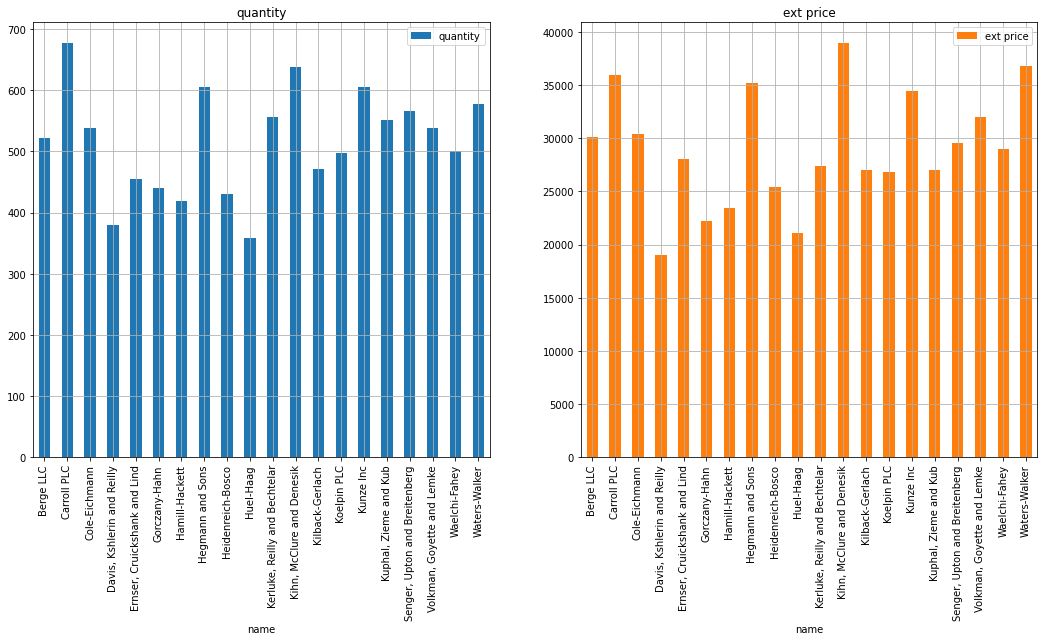

In [25]:
sales_totals.plot(kind='bar',grid=True,subplots=True,layout=(1,2),figsize=(18,8)) #layout - shape (row x col)
plt.show()

<AxesSubplot:ylabel='name'>

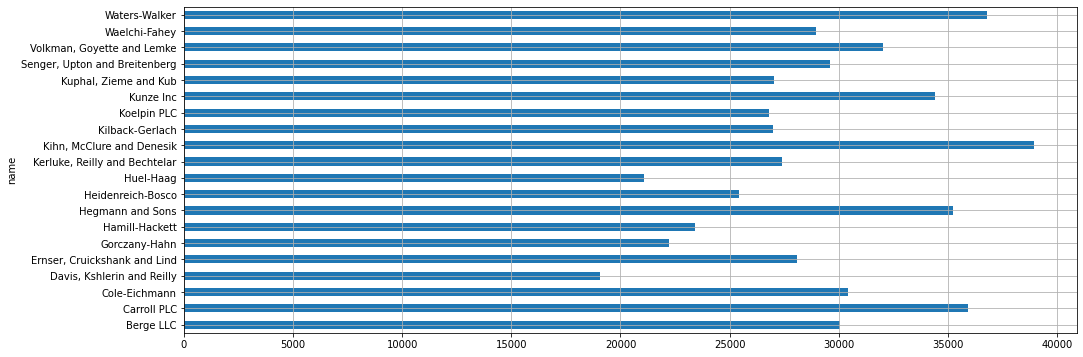

In [26]:
sales_totals['ext price'].plot(kind='barh',grid=True,figsize=(16,6)) # cm, inch??

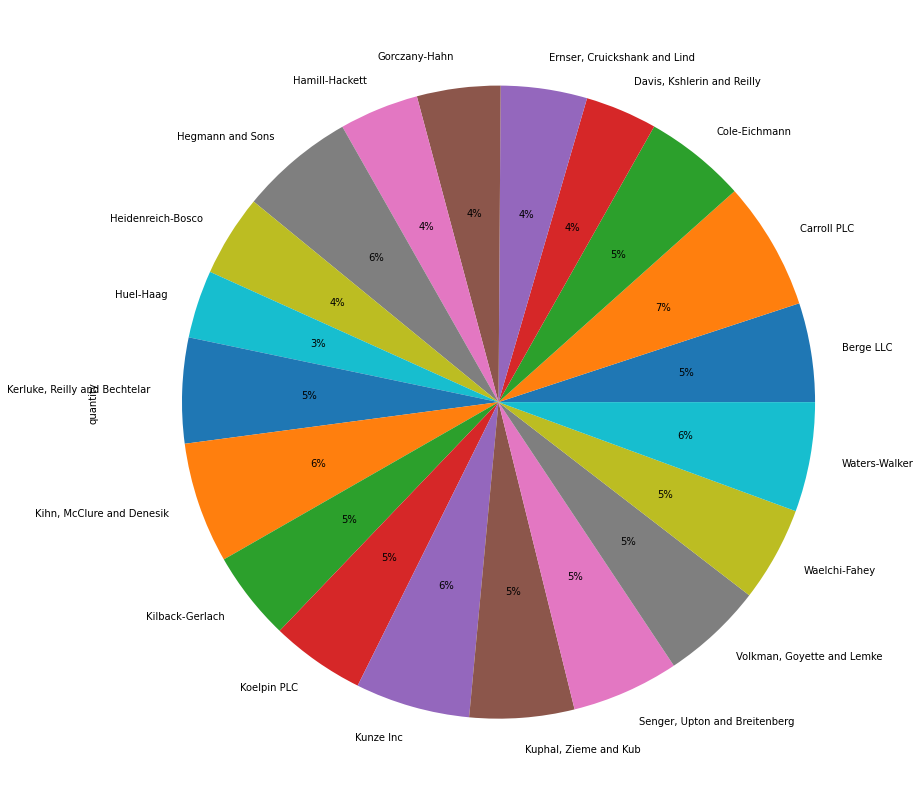

In [27]:
#sales_totals.plot(kind='pie',subplots=True, layout=(20,1), figsize=(18,40))
#sales_totals['ext price'].plot(kind='pie',subplots=True,layout=(7,2),figsize=(18,40),autopct='%.0f%%')
sales_totals['quantity'].plot(kind='pie',figsize=(13,14),autopct='%.0f%%')
plt.tight_layout()
plt.show()

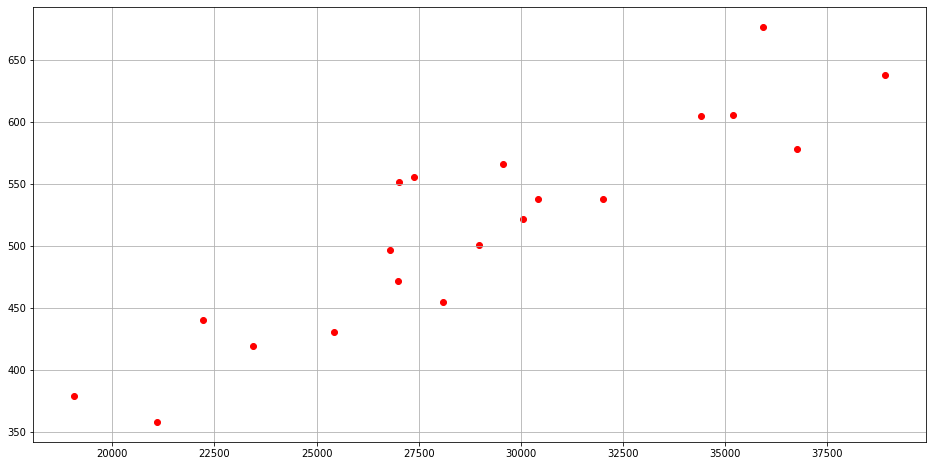

In [28]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.scatter(sales_totals['ext price'],sales_totals['quantity'],color='r',marker='o')#dots
#plt.plot(sales_totals['ext price'],sales_totals['quantity'],color='r',marker='o') #line
plt.show()

In [29]:
sales_totals[sales_totals['ext price']<20000]

,quantity,ext price
name,,
"Davis, Kshlerin and Reilly",379,19054.76


<AxesSubplot:xlabel='name'>

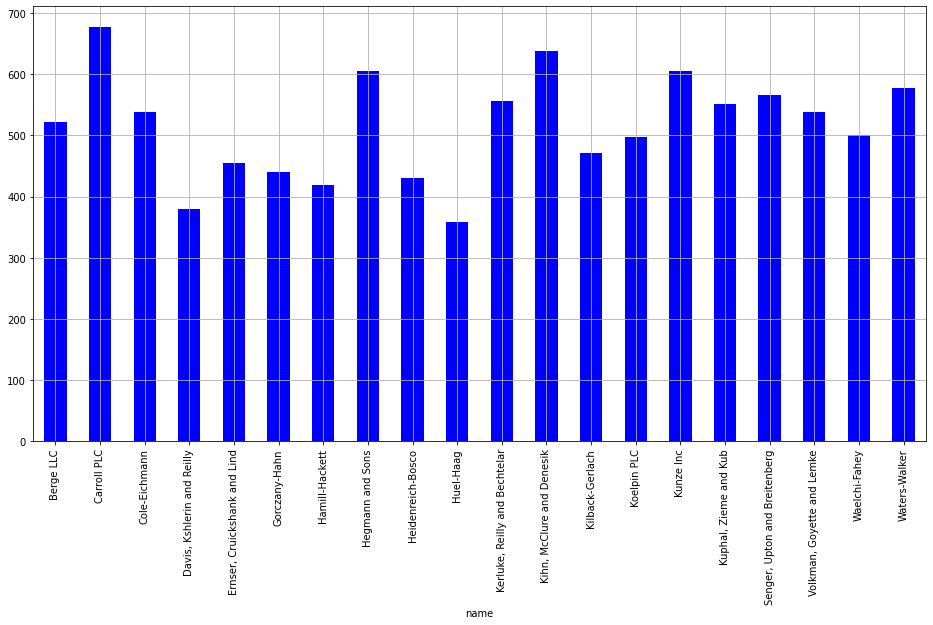

In [30]:
sales_totals['quantity'].plot(kind='bar',grid=True, figsize=(16,8),color='b')

In [31]:
len(sales_totals)

20

In [32]:
type(sales_totals)

pandas.core.frame.DataFrame

In [33]:
sales_totals.columns

Index(['quantity', 'ext price'], dtype='object')

In [34]:
sales_totals.index

Index(['Berge LLC', 'Carroll PLC', 'Cole-Eichmann',
       'Davis, Kshlerin and Reilly', 'Ernser, Cruickshank and Lind',
       'Gorczany-Hahn', 'Hamill-Hackett', 'Hegmann and Sons',
       'Heidenreich-Bosco', 'Huel-Haag', 'Kerluke, Reilly and Bechtelar',
       'Kihn, McClure and Denesik', 'Kilback-Gerlach', 'Koelpin PLC',
       'Kunze Inc', 'Kuphal, Zieme and Kub', 'Senger, Upton and Breitenberg',
       'Volkman, Goyette and Lemke', 'Waelchi-Fahey', 'Waters-Walker'],
      dtype='object', name='name')

In [35]:
sales_totals.loc['Carroll PLC']['ext price']  #iloc, loc

35934.30999999999

In [36]:
sales_totals.quantity

name
Berge LLC                        522
Carroll PLC                      677
Cole-Eichmann                    538
Davis, Kshlerin and Reilly       379
Ernser, Cruickshank and Lind     455
Gorczany-Hahn                    440
Hamill-Hackett                   419
Hegmann and Sons                 606
Heidenreich-Bosco                431
Huel-Haag                        358
Kerluke, Reilly and Bechtelar    556
Kihn, McClure and Denesik        638
Kilback-Gerlach                  472
Koelpin PLC                      497
Kunze Inc                        605
Kuphal, Zieme and Kub            552
Senger, Upton and Breitenberg    566
Volkman, Goyette and Lemke       538
Waelchi-Fahey                    501
Waters-Walker                    578
Name: quantity, dtype: int64

<hr /> 

# FILTER

In [37]:
#sales[sales['name'].str.contains(r'K')]

sales_totals.filter(regex='^K',axis=0) #AXIS=0 for INDEX!           #sales_totals.iloc[[0,1,2]] #TEST
#sales_totals.filter(regex='K',axis=1) #?? function use?, parameter: missing! ->Documentation

,quantity,ext price
name,,
"Kerluke, Reilly and Bechtelar",556,27389.43
"Kihn, McClure and Denesik",638,38935.29
Kilback-Gerlach,472,26987.20
Koelpin PLC,497,26811.66
Kunze Inc,605,34406.54
"Kuphal, Zieme and Kub",552,27031.86


In [38]:
sales_totals.T   #.index , .columns

name,Berge LLC,Carroll PLC,Cole-Eichmann,"Davis, Kshlerin and Reilly","Ernser, Cruickshank and Lind",Gorczany-Hahn,Hamill-Hackett,Hegmann and Sons,Heidenreich-Bosco,Huel-Haag,"Kerluke, Reilly and Bechtelar","Kihn, McClure and Denesik",Kilback-Gerlach,Koelpin PLC,Kunze Inc,"Kuphal, Zieme and Kub","Senger, Upton and Breitenberg","Volkman, Goyette and Lemke",Waelchi-Fahey,Waters-Walker
quantity,522.00,677.00,538.00,379.00,455.00,440.0,419.00,606.00,431.00,358.00,556.00,638.00,472.0,497.00,605.00,552.00,566.00,538.00,501.00,578.00
ext price,30064.87,35934.31,30435.42,19054.76,28089.02,22207.9,23433.78,35213.72,25428.29,21087.88,27389.43,38935.29,26987.2,26811.66,34406.54,27031.86,29577.46,32006.87,28968.68,36778.96


### Filtering using  re!

In [39]:
import re
[values for index,values in enumerate(sales_totals.index) if re.search(r'H[a-z]+',values)]

#list(enumerate(sales_totals.index))
#l=[12,23,56]
#list(enumerate())


['Gorczany-Hahn',
 'Hamill-Hackett',
 'Hegmann and Sons',
 'Heidenreich-Bosco',
 'Huel-Haag']

In [40]:


#sales_totals.loc['Carroll PLC']['ext price']
sales_totals.loc[[values for index,values in enumerate(sales_totals.index) if re.search(r'H[a-z]+',values)]]

,quantity,ext price
name,,
Gorczany-Hahn,440,22207.90
Hamill-Hackett,419,23433.78
Hegmann and Sons,606,35213.72
Heidenreich-Bosco,431,25428.29
Huel-Haag,358,21087.88


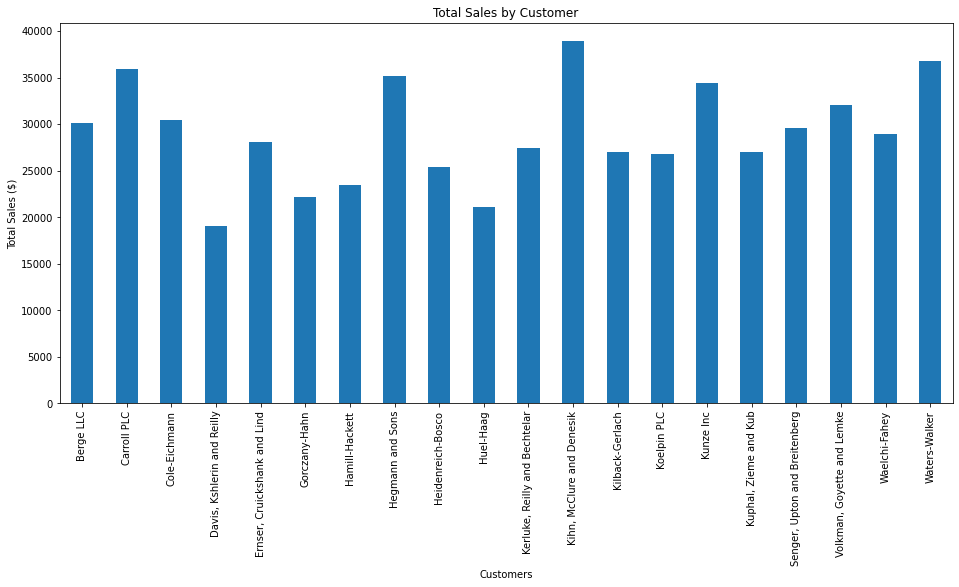

In [41]:
# Create a basic bar chart for the sales data and show it
#bar_plot = sales_totals.sort(columns='ext price',ascending=False).plot(kind='bar',legend=None,title="Total Sales by Customer")

bar_plot = sales_totals['ext price'].plot(kind='bar',title="Total Sales by Customer",figsize=(16,7)) #16,7 (x,y): cm, inch??
#sales_totals.plot(kind='bar',legend=None,title="Total Sales by Customer",figsize=(16,7))
bar_plot.set_xlabel("Customers")
bar_plot.set_ylabel("Total Sales ($)")
plt.show()

## Groupby...UnStack

In [42]:
# Do a similar chart but break down by category in stacked bars
# Select the appropriate columns and group by name and category

customers = sales[['name','category','ext price','date']]
customers.head(5)

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:00
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:00
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:00
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:00
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:00


In [43]:
category_group = customers.groupby(['name','category']).sum()  #'date'

In [44]:
#category_group  #.T??

In [45]:
category_group.tail(10)

ext price
name                          category           
Senger, Upton and Breitenberg Shoes      12407.88
Volkman, Goyette and Lemke    Belt        4429.01
                              Shirt      12791.27
                              Shoes      14786.59
Waelchi-Fahey                 Belt        8285.72
                              Shirt      11689.05
                              Shoes       8993.91
Waters-Walker                 Belt        5957.24
                              Shirt      18633.71
                              Shoes      12188.01

In [46]:
#category_group.index
#category_group.T

category_group.loc['Waters-Walker'].loc['Shoes']  #Multi Index -> loc loc

ext price    12188.01
Name: Shoes, dtype: float64

In [47]:
category_group.T #(Transpose -> row>col, col>row)

name      Berge LLC                   Carroll PLC                      \
category       Belt    Shirt    Shoes        Belt     Shirt     Shoes   
ext price   6033.53  9670.24  14361.1     9359.26  13717.61  12857.44   

name      Cole-Eichmann                    Davis, Kshlerin and Reilly  ...  \
category           Belt     Shirt    Shoes                       Belt  ...   
ext price        8112.7  14528.01  7794.71                    1604.13  ...   

name      Senger, Upton and Breitenberg Volkman, Goyette and Lemke            \
category                          Shoes                       Belt     Shirt   
ext price                      12407.88                    4429.01  12791.27   

name                Waelchi-Fahey                    Waters-Walker            \
category      Shoes          Belt     Shirt    Shoes          Belt     Shirt   
ext price  14786.59       8285.72  11689.05  8993.91       5957.24  18633.71   

name                 
category      Shoes  
ext price  12188.01  

[1 rows x 60 columns]

In [48]:
unstack = category_group.unstack() #structural breakdown: row,col  (T)
unstack

ext price                    
category                           Belt     Shirt     Shoes
name                                                       
Berge LLC                       6033.53   9670.24  14361.10
Carroll PLC                     9359.26  13717.61  12857.44
Cole-Eichmann                   8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly      1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind    5894.38  16944.19   5250.45
Gorczany-Hahn                   3642.48  12576.83   5988.59
Hamill-Hackett                  1609.74   8880.04  12944.00
Hegmann and Sons                4909.38  16774.47  13529.87
Heidenreich-Bosco               6262.94   5965.25  13200.10
Huel-Haag                       2219.51  11944.01   6924.36
Kerluke, Reilly and Bechtelar   4102.11  12958.23  10329.09
Kihn, McClure and Denesik      10116.90  18956.35   9862.04
Kilback-Gerlach                 2863.40   9904.85  14218.95
Koelpin PLC                     5327.96   7908.28  13575.42
Kunze Inc                       4264.59  15638.87  14503.08
Kuphal, Zieme and Kub           2009.69  12101.14  12921.03
Senger, Upton and Breitenberg   9509.88   7659.70  12407.88
Volkman, Goyette and Lemke      4429.01  12791.27  14786.59
Waelchi-Fahey                   8285.72  11689.05   8993.91
Waters-Walker                   5957.24  18633.71  12188.01

In [49]:
unstack.columns

MultiIndex([('ext price',  'Belt'),
            ('ext price', 'Shirt'),
            ('ext price', 'Shoes')],
           names=[None, 'category'])

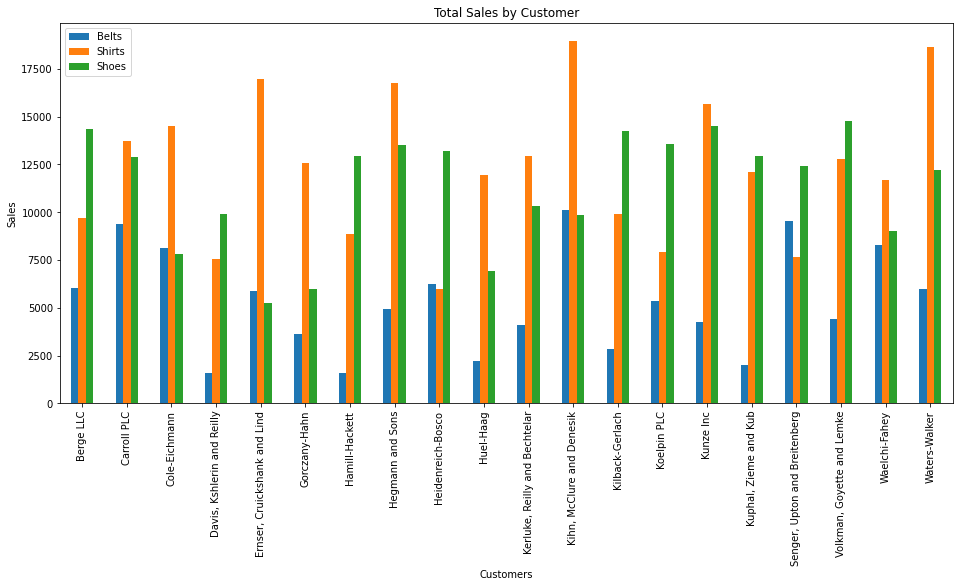

In [50]:
# Plot and show the stacked bar chart

#stack_bar_plot = category_group.unstack().plot(kind='bar',stacked=True,title="Total Sales by Customer (categorical)",figsize=(15,7))
stack_bar_plot = unstack.plot(kind='bar',title="Total Sales by Customer",figsize=(16,7))
stack_bar_plot.set_xlabel("Customers")
stack_bar_plot.set_ylabel("Sales")
stack_bar_plot.legend(["Belts","Shirts","Shoes"])#, loc=1,ncol=3)
plt.show()

array([<AxesSubplot:title={'center':'(ext price, Belt)'}, xlabel='name'>,
       <AxesSubplot:title={'center':'(ext price, Shirt)'}, xlabel='name'>,
       <AxesSubplot:title={'center':'(ext price, Shoes)'}, xlabel='name'>],
      dtype=object)

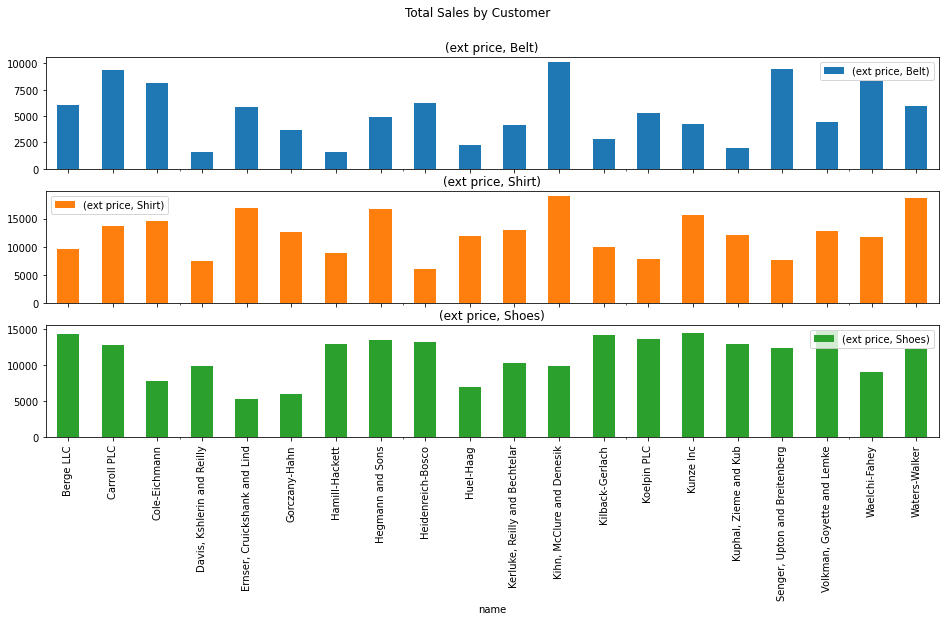

In [51]:
unstack.plot(kind='bar',title="Total Sales by Customer",figsize=(16,7), subplots=True)

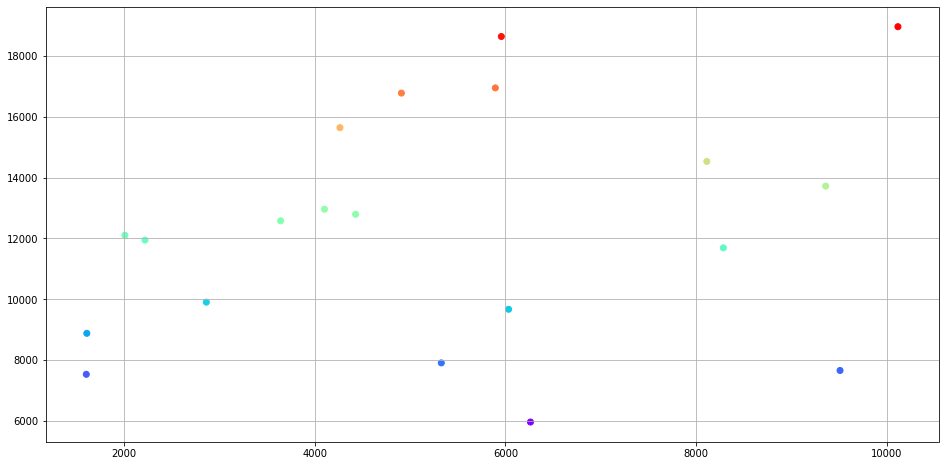

In [52]:
plt.figure(figsize=(16,8))
plt.grid(True)
#plt.scatter(unstack[('ext price','Belt')],unstack[('ext price','Shirt')],color='r',marker='o')#dots
plt.scatter(unstack[('ext price','Belt')],unstack[('ext price','Shirt')],marker='o',cmap="rainbow",c=unstack[('ext price','Shirt')]) #TASK: colorbar ?
plt.show()

In [53]:
belt = unstack[('ext price','Belt')]
shirt = unstack[('ext price','Shirt')]
belt

name
Berge LLC                         6033.53
Carroll PLC                       9359.26
Cole-Eichmann                     8112.70
Davis, Kshlerin and Reilly        1604.13
Ernser, Cruickshank and Lind      5894.38
Gorczany-Hahn                     3642.48
Hamill-Hackett                    1609.74
Hegmann and Sons                  4909.38
Heidenreich-Bosco                 6262.94
Huel-Haag                         2219.51
Kerluke, Reilly and Bechtelar     4102.11
Kihn, McClure and Denesik        10116.90
Kilback-Gerlach                   2863.40
Koelpin PLC                       5327.96
Kunze Inc                         4264.59
Kuphal, Zieme and Kub             2009.69
Senger, Upton and Breitenberg     9509.88
Volkman, Goyette and Lemke        4429.01
Waelchi-Fahey                     8285.72
Waters-Walker                     5957.24
Name: (ext price, Belt), dtype: float64

In [54]:
# Create a simple histogram of purchase volumes

# Plot Overview ????  
#purchase_patterns = sales[sales['ext price']<=300][['category','ext price']]
#purchase_patterns = sales[sales['ext price']<=300]['category']
#purchase_patterns = sales[sales['ext price']<=300][ [columnName1,columnName2] ]
#len(purchase_patterns)
#purchase_patterns.count()

purchase_patterns = sales[['ext price','category','date']] #TEST: exp price <=300
purchase_patterns['ext price'][::8]

0       578.24
8       649.23
16      142.48
24      667.52
32       71.50
        ...   
960    1122.29
968     416.60
976     184.46
984      91.96
992     244.44
Name: ext price, Length: 125, dtype: float64

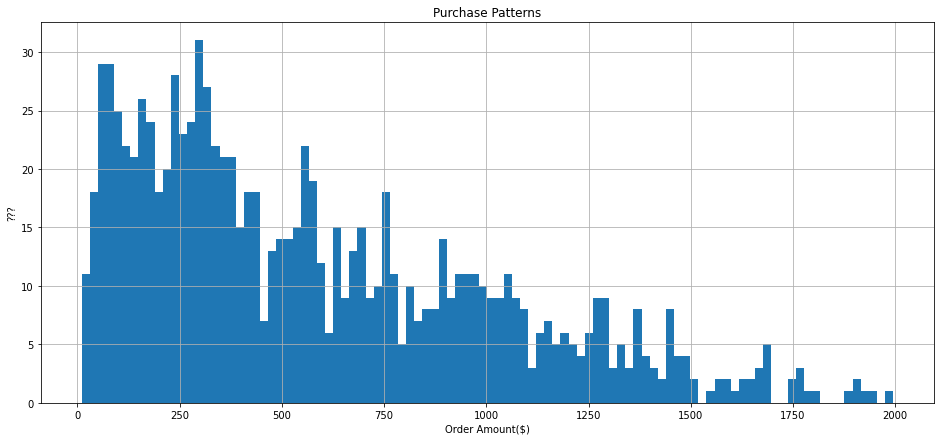

In [55]:
purchase_plot = purchase_patterns['ext price'].hist(bins=100,figsize=(16,7))  #Distribution: min-max > range (TASK: bin?)
purchase_plot.set_title("Purchase Patterns")
purchase_plot.set_xlabel("Order Amount($)")
purchase_plot.set_ylabel("???")
plt.show()

<AxesSubplot:ylabel='Density'>

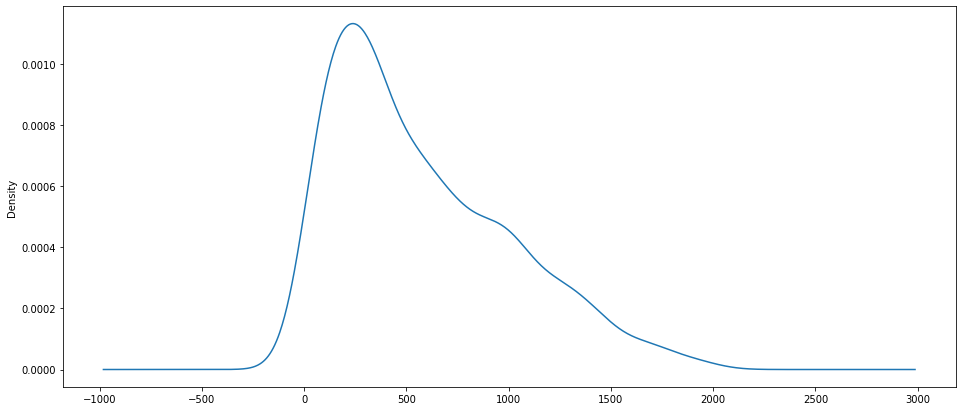

In [56]:
purchase_patterns['ext price'].plot.kde(figsize=(16,7)) #.apply(np.log) -> kernel density estimate

<AxesSubplot:>

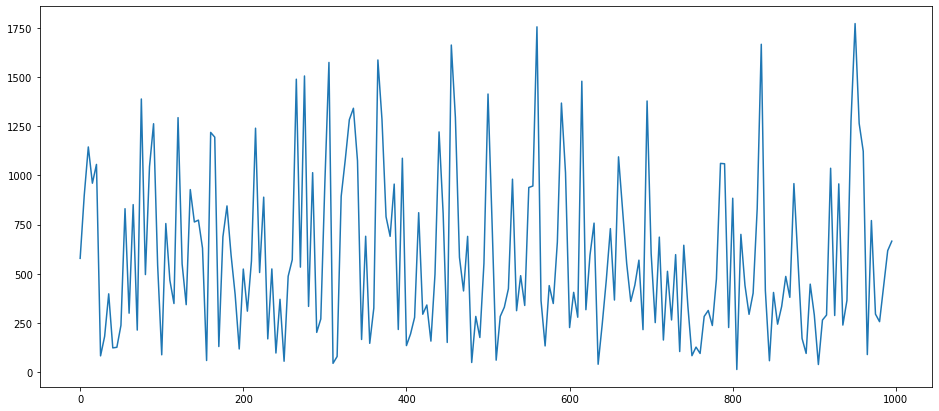

In [57]:
purchase_patterns['ext price'][::5].plot(figsize=(16,7))

## TASK: FutureWarning: .... .resample() is deprecated the new syntax is .resample(...)..apply(<func>)     

In [58]:
# Create a line chart showing purchases by month
#purchase_patterns = sales[['ext price','category','date']]
purchase_pattern = purchase_patterns.set_index('date')
purchase_pattern.head(5)

,ext price,category
date,,
2014-09-27 07:13:00,578.24,Belt
2014-07-29 02:10:00,1018.78,Shoes
2014-03-01 10:51:00,289.92,Shirt
2013-11-17 20:41:00,413.40,Shirt
2014-01-03 08:14:00,1793.52,Shirt


C:\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='date'>

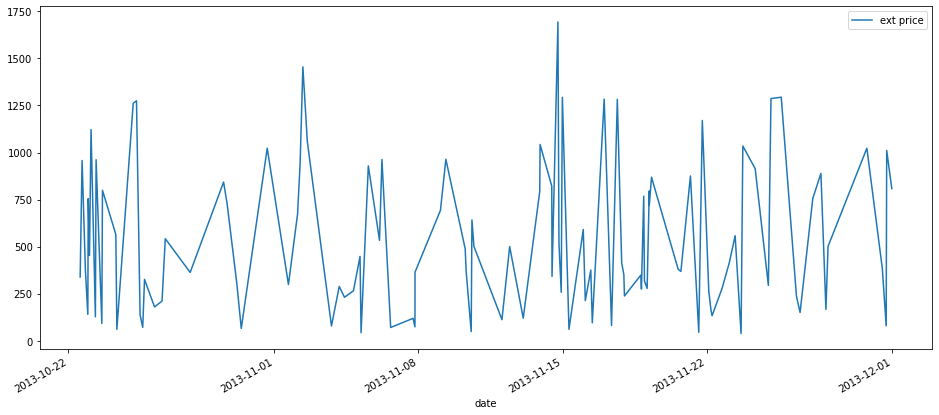

In [59]:
purchase_pattern.loc['2013/10/01':'2013/11/30'].plot(figsize=(16,7))
3plt.savefig("filename.ext")

In [60]:
purchase_patterns['date'].describe()  #datetime_is_numeric=True (std: Missing)
#purchase_patterns['date'].describe(datetime_is_numeric=True)  #datetime_is_numeric=True (std: Missing)

C:\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    1000
unique                    998
top       2014-02-15 06:51:00
freq                        2
first     2013-10-22 13:54:00
last      2014-10-22 11:43:00
Name: date, dtype: object

In [61]:
purchase_pattern

,ext price,category
date,,
2014-09-27 07:13:00,578.24,Belt
2014-07-29 02:10:00,1018.78,Shoes
2014-03-01 10:51:00,289.92,Shirt
2013-11-17 20:41:00,413.40,Shirt
2014-01-03 08:14:00,1793.52,Shirt
...,...,...
2014-08-03 10:39:00,665.50,Belt
2014-05-03 21:18:00,314.56,Shoes
2014-06-14 12:43:00,1182.35,Shoes


#purchase_pattern.resample('M')
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

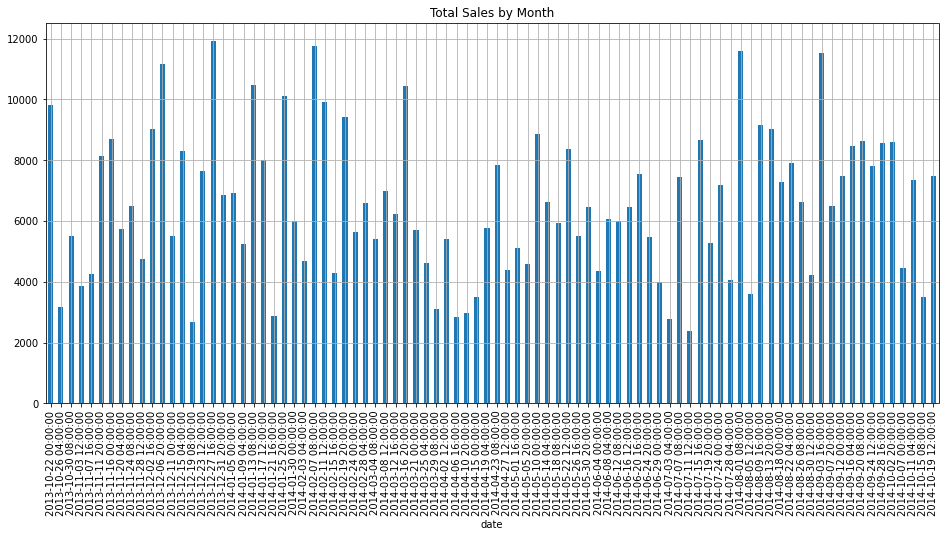

In [62]:
#purchase_pattern.resample('M').mean().plot(title="Total Sales by Month",legend=None,figsize=(16,7))
month_plot = purchase_pattern.resample('100H').sum().plot(title="Total Sales by Month",legend=None,figsize=(16,7),kind='bar', grid=True)
fig = month_plot.get_figure()   # offset       # every sunday trans - total ???

# Show the image, then save it

In [63]:
#Show the image, then save it
fig.savefig("total-sales_new.png")

# TASK: Plot Line chart for name='Berge LLC' against its total purchases!

In [64]:
### 

# <hr /> <h2>## Pivot Table</h2>
### Re-Arrange & Summarizes data in better way align with some aggregate!

In [65]:
sales.head(10)
#sales['category'].describe()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:00
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:00
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:00
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:00
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:00
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:00
6,995267,Cole-Eichmann,GS-86623,Shoes,18,15.28,275.04,2014-04-09 16:15:00
7,524021,Hegmann and Sons,LL-46261,Shoes,7,78.78,551.46,2014-06-18 19:25:00
8,929400,"Senger, Upton and Breitenberg",LW-86841,Shoes,17,38.19,649.23,2014-02-10 05:55:00
9,563905,"Kerluke, Reilly and Bechtelar",KV-99194,Shirt,12,26.98,323.76,2014-05-20 00:21:00


In [66]:
#1
#pivot1 = pd.pivot_table(sales,index=["name","category"],values=["ext price"])    #aggregate is applied to "values" using mean()

#2
pivot1 = pd.pivot_table(sales,index=["name","category"])
pivot1.tail(9)

account number   ext price   quantity  \
name                       category                                          
Volkman, Goyette and Lemke Belt              750461  553.626250  12.000000   
                           Shirt             750461  639.563500  11.000000   
                           Shoes             750461  739.329500  11.100000   
Waelchi-Fahey              Belt              659366  487.395294   8.764706   
                           Shirt             659366  584.452500  10.050000   
                           Shoes             659366  529.053529   8.882353   
Waters-Walker              Belt               93356  992.873333  13.833333   
                           Shirt              93356  776.404583  12.000000   
                           Shoes              93356  609.400500  10.350000   

                                     unit price  
name                       category              
Volkman, Goyette and Lemke Belt       49.841250  
                           Shirt      56.812500  
                           Shoes      64.882000  
Waelchi-Fahey              Belt       56.806471  
                           Shirt      52.883500  
                           Shoes      58.472353  
Waters-Walker              Belt       68.678333  
                           Shirt      66.806667  
                           Shoes      64.426000

In [67]:
## --
sales[sales['name'].str.contains('Walker') & (sales['category']=='Shirt')]['quantity'].mean() #check in output above for Walker

12.0

In [68]:
pivot1.loc['Waters-Walker','Belt']['quantity'] #finding values using multi index!

13.833333333333334

In [69]:
sales[sales.name.str.contains('Waters-Walker')]['category'].value_counts()#count->len

Shirt    24
Shoes    20
Belt      6
Name: category, dtype: int64

In [70]:
sales[sales.name.str.contains('Waters-Walker')].tail(3)

,account number,name,sku,category,quantity,unit price,ext price,date
986,93356,Waters-Walker,KV-99194,Shirt,20,99.74,1994.80,2014-04-18 15:39:00
990,93356,Waters-Walker,AS-93055,Shirt,9,68.62,617.58,2014-08-12 08:06:00
997,93356,Waters-Walker,GS-86623,Shoes,13,90.95,1182.35,2014-06-14 12:43:00


In [71]:
pd.pivot_table(sales[sales.name.str.contains('Waters-Walker')],index=["name","category"],aggfunc=[np.sum,np.mean,np.std])#,max,np.std,len]).tail(6)  #mean()

sum                                \
                       account number ext price quantity unit price   
name          category                                                
Waters-Walker Belt             560136   5957.24       83     412.07   
              Shirt           2240544  18633.71      288    1603.36   
              Shoes           1867120  12188.01      207    1288.52   

                                 mean                                    \
                       account number   ext price   quantity unit price   
name          category                                                    
Waters-Walker Belt              93356  992.873333  13.833333  68.678333   
              Shirt             93356  776.404583  12.000000  66.806667   
              Shoes             93356  609.400500  10.350000  64.426000   

                                  std                                   
                       account number   ext price  quantity unit price  
name          category                                                  
Waters-Walker Belt                  0  601.468709  6.705719  17.266458  
              Shirt                 0  460.790488  5.830952  21.680117  
              Shoes                 0  371.441578  5.824404  23.160560

In [89]:
pd.pivot_table(sales[sales.name.str.contains('Waters-Walker')],index=["name","category"],values=["ext price"],aggfunc=[sum,np.mean,min,max,np.std,len]).tail(6)  #mean()

sum        mean       min       max         std  \
                       ext price   ext price ext price ext price   ext price   
name          category                                                         
Waters-Walker Belt       5957.24  992.873333    178.83   1812.03  601.468709   
              Shirt     18633.71  776.404583     95.48   1994.80  460.790488   
              Shoes     12188.01  609.400500     76.61   1182.35  371.441578   

                             len  
                       ext price  
name          category            
Waters-Walker Belt           6.0  
              Shirt         24.0  
              Shoes         20.0

In [73]:
sales[sales['name'].str.contains('Walker') & (sales['category']=='Belt')]['ext price'].mean() #check in output aboev for Walker

992.8733333333333

In [74]:
len(sales[sales['name'].str.contains('Walker') & (sales['category']=='Belt')]['ext price'])

6

In [75]:
#applying sum,mean,len for "values"!
#"columns" helps to segment data more clearly

pd.pivot_table(sales,index=["name"],values=["ext price"],aggfunc=[np.sum,np.mean,len])#.max() #reduce (MapFilterReduce)

,sum,mean,len
,ext price,ext price,ext price
name,,,
Berge LLC,30064.87,578.170577,52.0
Carroll PLC,35934.31,630.426491,57.0
Cole-Eichmann,30435.42,596.772941,51.0
"Davis, Kshlerin and Reilly",19054.76,464.750244,41.0
"Ernser, Cruickshank and Lind",28089.02,597.638723,47.0
Gorczany-Hahn,22207.90,528.759524,42.0
Hamill-Hackett,23433.78,532.585909,44.0
Hegmann and Sons,35213.72,607.133103,58.0


In [76]:
pd.pivot_table(sales,index=["name"],values=["ext price"],aggfunc=[np.sum,np.mean,len]).min() #min()  max()

sum   ext price    19054.760000
mean  ext price      464.750244
len   ext price       40.000000
dtype: float64

In [91]:
pd.pivot_table(sales,index=["name"],values=["ext price"],columns=['category'],aggfunc=[np.sum,np.mean,len]).tail()

sum                            mean  \
                              ext price                       ext price   
category                           Belt     Shirt     Shoes        Belt   
name                                                                      
Kuphal, Zieme and Kub           2009.69  12101.14  12921.03  502.422500   
Senger, Upton and Breitenberg   9509.88   7659.70  12407.88  500.520000   
Volkman, Goyette and Lemke      4429.01  12791.27  14786.59  553.626250   
Waelchi-Fahey                   8285.72  11689.05   8993.91  487.395294   
Waters-Walker                   5957.24  18633.71  12188.01  992.873333   

                                                            len              
                                                      ext price              
category                            Shirt       Shoes      Belt Shirt Shoes  
name                                                                         
Kuphal, Zieme and Kub          550.051818  496.962692       4.0  22.0  26.0  
Senger, Upton and Breitenberg  450.570588  539.473043      19.0  17.0  23.0  
Volkman, Goyette and Lemke     639.563500  739.329500       8.0  20.0  20.0  
Waelchi-Fahey                  584.452500  529.053529      17.0  20.0  17.0  
Waters-Walker                  776.404583  609.400500       6.0  24.0  20.0

In [78]:
#margins=True, summarizes with 'All'! "fill_value=anyvalue" if in case any empty values are found

pd.pivot_table(sales,index=["name"],values=["ext price"],columns=['category'],aggfunc=[np.sum,np.mean],fill_value=0,margins=True,margins_name='TOTAL') 

sum                                   \
                               ext price                                    
category                            Belt      Shirt      Shoes      TOTAL   
name                                                                        
Berge LLC                        6033.53    9670.24   14361.10   30064.87   
Carroll PLC                      9359.26   13717.61   12857.44   35934.31   
Cole-Eichmann                    8112.70   14528.01    7794.71   30435.42   
Davis, Kshlerin and Reilly       1604.13    7533.03    9917.60   19054.76   
Ernser, Cruickshank and Lind     5894.38   16944.19    5250.45   28089.02   
Gorczany-Hahn                    3642.48   12576.83    5988.59   22207.90   
Hamill-Hackett                   1609.74    8880.04   12944.00   23433.78   
Hegmann and Sons                 4909.38   16774.47   13529.87   35213.72   
Heidenreich-Bosco                6262.94    5965.25   13200.10   25428.29   
Huel-Haag                        2219.51   11944.01    6924.36   21087.88   
Kerluke, Reilly and Bechtelar    4102.11   12958.23   10329.09   27389.43   
Kihn, McClure and Denesik       10116.90   18956.35    9862.04   38935.29   
Kilback-Gerlach                  2863.40    9904.85   14218.95   26987.20   
Koelpin PLC                      5327.96    7908.28   13575.42   26811.66   
Kunze Inc                        4264.59   15638.87   14503.08   34406.54   
Kuphal, Zieme and Kub            2009.69   12101.14   12921.03   27031.86   
Senger, Upton and Breitenberg    9509.88    7659.70   12407.88   29577.46   
Volkman, Goyette and Lemke       4429.01   12791.27   14786.59   32006.87   
Waelchi-Fahey                    8285.72   11689.05    8993.91   28968.68   
Waters-Walker                    5957.24   18633.71   12188.01   36778.96   
TOTAL                          106514.55  246775.13  226554.22  579843.90   

                                     mean                                      
                                ext price                                      
category                             Belt       Shirt       Shoes       TOTAL  
name                                                                           
Berge LLC                      670.392222  483.512000  624.395652  578.170577  
Carroll PLC                    668.518571  623.527727  612.259048  630.426491  
Cole-Eichmann                  624.053846  691.810000  458.512353  596.772941  
Davis, Kshlerin and Reilly     267.355000  470.814375  521.978947  464.750244  
Ernser, Cruickshank and Lind   654.931111  706.007917  375.032143  597.638723  
Gorczany-Hahn                  303.540000  598.896667  665.398889  528.759524  
Hamill-Hackett                 402.435000  522.355294  562.782609  532.585909  
Hegmann and Sons               490.938000  645.171923  614.994091  607.133103  
Heidenreich-Bosco              626.294000  596.525000  660.005000  635.707250  
Huel-Haag                      246.612222  628.632105  461.624000  490.415814  
Kerluke, Reilly and Bechtelar  512.763750  617.058571  449.090870  526.719808  
Kihn, McClure and Denesik      843.075000  702.087037  519.054737  671.298103  
Kilback-Gerlach                477.233333  582.638235  646.315909  599.715556  
Koelpin PLC                    380.568571  527.218667  565.642500  505.880377  
Kunze Inc                      710.765000  625.554800  630.568696  637.158148  
Kuphal, Zieme and Kub          502.422500  550.051818  496.962692  519.843462  
Senger, Upton and Breitenberg  500.520000  450.570588  539.473043  501.312881  
Volkman, Goyette and Lemke     553.626250  639.563500  739.329500  666.809792  
Waelchi-Fahey                  487.395294  584.452500  529.053529  536.457037  
Waters-Walker                  992.873333  776.404583  609.400500  735.579200  
TOTAL                          543.441582  610.829530  566.385550  579.843900

In [79]:
#apply distinct function to choosen values, (column as key and function as value inside dictionary)

pd.pivot_table(sales,
               index=["name"],values=["ext price","quantity"],columns=['category'],
               aggfunc={"quantity":len,"ext price":np.sum},margins=True)#//aggfunc={"Quantity":len,"Price":np.sum}

ext price                                   \
category                            Belt      Shirt      Shoes        All   
name                                                                        
Berge LLC                        6033.53    9670.24   14361.10   30064.87   
Carroll PLC                      9359.26   13717.61   12857.44   35934.31   
Cole-Eichmann                    8112.70   14528.01    7794.71   30435.42   
Davis, Kshlerin and Reilly       1604.13    7533.03    9917.60   19054.76   
Ernser, Cruickshank and Lind     5894.38   16944.19    5250.45   28089.02   
Gorczany-Hahn                    3642.48   12576.83    5988.59   22207.90   
Hamill-Hackett                   1609.74    8880.04   12944.00   23433.78   
Hegmann and Sons                 4909.38   16774.47   13529.87   35213.72   
Heidenreich-Bosco                6262.94    5965.25   13200.10   25428.29   
Huel-Haag                        2219.51   11944.01    6924.36   21087.88   
Kerluke, Reilly and Bechtelar    4102.11   12958.23   10329.09   27389.43   
Kihn, McClure and Denesik       10116.90   18956.35    9862.04   38935.29   
Kilback-Gerlach                  2863.40    9904.85   14218.95   26987.20   
Koelpin PLC                      5327.96    7908.28   13575.42   26811.66   
Kunze Inc                        4264.59   15638.87   14503.08   34406.54   
Kuphal, Zieme and Kub            2009.69   12101.14   12921.03   27031.86   
Senger, Upton and Breitenberg    9509.88    7659.70   12407.88   29577.46   
Volkman, Goyette and Lemke       4429.01   12791.27   14786.59   32006.87   
Waelchi-Fahey                    8285.72   11689.05    8993.91   28968.68   
Waters-Walker                    5957.24   18633.71   12188.01   36778.96   
All                            106514.55  246775.13  226554.22  579843.90   

                              quantity                    
category                          Belt Shirt Shoes   All  
name                                                      
Berge LLC                            9    20    23    52  
Carroll PLC                         14    22    21    57  
Cole-Eichmann                       13    21    17    51  
Davis, Kshlerin and Reilly           6    16    19    41  
Ernser, Cruickshank and Lind         9    24    14    47  
Gorczany-Hahn                       12    21     9    42  
Hamill-Hackett                       4    17    23    44  
Hegmann and Sons                    10    26    22    58  
Heidenreich-Bosco                   10    10    20    40  
Huel-Haag                            9    19    15    43  
Kerluke, Reilly and Bechtelar        8    21    23    52  
Kihn, McClure and Denesik           12    27    19    58  
Kilback-Gerlach                      6    17    22    45  
Koelpin PLC                         14    15    24    53  
Kunze Inc                            6    25    23    54  
Kuphal, Zieme and Kub                4    22    26    52  
Senger, Upton and Breitenberg       19    17    23    59  
Volkman, Goyette and Lemke           8    20    20    48  
Waelchi-Fahey                       17    20    17    54  
Waters-Walker                        6    24    20    50  
All                                196   404   400  1000

In [80]:
pivotFilter = pd.pivot_table(sales,index=["name","category"],
               values=["ext price","quantity"],aggfunc=[np.sum,np.mean,len],fill_value=0,margins=True)
#pivotFilter

In [81]:
pivotFilter.tail() 

sum                 mean                  len  \
                        ext price quantity   ext price   quantity ext price   
name          category                                                        
Waelchi-Fahey Shoes       8993.91      151  529.053529   8.882353        17   
Waters-Walker Belt        5957.24       83  992.873333  13.833333         6   
              Shirt      18633.71      288  776.404583  12.000000        24   
              Shoes      12188.01      207  609.400500  10.350000        20   
All                     579843.90    10328  579.843900  10.328000      1000   

                                 
                       quantity  
name          category           
Waelchi-Fahey Shoes          17  
Waters-Walker Belt            6  
              Shirt          24  
              Shoes          20  
All                        1000

In [82]:
pivotFilter.loc['Waters-Walker']#,'Belt']]

sum                 mean                  len         
         ext price quantity   ext price   quantity ext price quantity
category                                                             
Belt       5957.24       83  992.873333  13.833333         6        6
Shirt     18633.71      288  776.404583  12.000000        24       24
Shoes     12188.01      207  609.400500  10.350000        20       20

## query()

In [83]:
pivotFilter.query("name==['Waters-Walker']")

sum                 mean                  len  \
                       ext price quantity   ext price   quantity ext price   
name          category                                                       
Waters-Walker Belt       5957.24       83  992.873333  13.833333         6   
              Shirt     18633.71      288  776.404583  12.000000        24   
              Shoes     12188.01      207  609.400500  10.350000        20   

                                 
                       quantity  
name          category           
Waters-Walker Belt            6  
              Shirt          24  
              Shoes          20

In [84]:
pivotFilter.query("category==['Shoes']")

sum                 mean  \
                                       ext price quantity   ext price   
name                          category                                  
Berge LLC                     Shoes     14361.10      236  624.395652   
Carroll PLC                   Shoes     12857.44      236  612.259048   
Cole-Eichmann                 Shoes      7794.71      155  458.512353   
Davis, Kshlerin and Reilly    Shoes      9917.60      185  521.978947   
Ernser, Cruickshank and Lind  Shoes      5250.45       96  375.032143   
Gorczany-Hahn                 Shoes      5988.59      100  665.398889   
Hamill-Hackett                Shoes     12944.00      239  562.782609   
Hegmann and Sons              Shoes     13529.87      240  614.994091   
Heidenreich-Bosco             Shoes     13200.10      233  660.005000   
Huel-Haag                     Shoes      6924.36      115  461.624000   
Kerluke, Reilly and Bechtelar Shoes     10329.09      211  449.090870   
Kihn, McClure and Denesik     Shoes      9862.04      186  519.054737   
Kilback-Gerlach               Shoes     14218.95      235  646.315909   
Koelpin PLC                   Shoes     13575.42      232  565.642500   
Kunze Inc                     Shoes     14503.08      271  630.568696   
Kuphal, Zieme and Kub         Shoes     12921.03      253  496.962692   
Senger, Upton and Breitenberg Shoes     12407.88      251  539.473043   
Volkman, Goyette and Lemke    Shoes     14786.59      222  739.329500   
Waelchi-Fahey                 Shoes      8993.91      151  529.053529   
Waters-Walker                 Shoes     12188.01      207  609.400500   

                                                        len           
                                         quantity ext price quantity  
name                          category                                
Berge LLC                     Shoes     10.260870        23       23  
Carroll PLC                   Shoes     11.238095        21       21  
Cole-Eichmann                 Shoes      9.117647        17       17  
Davis, Kshlerin and Reilly    Shoes      9.736842        19       19  
Ernser, Cruickshank and Lind  Shoes      6.857143        14       14  
Gorczany-Hahn                 Shoes     11.111111         9        9  
Hamill-Hackett                Shoes     10.391304        23       23  
Hegmann and Sons              Shoes     10.909091        22       22  
Heidenreich-Bosco             Shoes     11.650000        20       20  
Huel-Haag                     Shoes      7.666667        15       15  
Kerluke, Reilly and Bechtelar Shoes      9.173913        23       23  
Kihn, McClure and Denesik     Shoes      9.789474        19       19  
Kilback-Gerlach               Shoes     10.681818        22       22  
Koelpin PLC                   Shoes      9.666667        24       24  
Kunze Inc                     Shoes     11.782609        23       23  
Kuphal, Zieme and Kub         Shoes      9.730769        26       26  
Senger, Upton and Breitenberg Shoes     10.913043        23       23  
Volkman, Goyette and Lemke    Shoes     11.100000        20       20  
Waelchi-Fahey                 Shoes      8.882353        17       17  
Waters-Walker                 Shoes     10.350000        20       20

# TASK: Create plot for data obtained from "pivot_table"

<AxesSubplot:xlabel='name,category'>

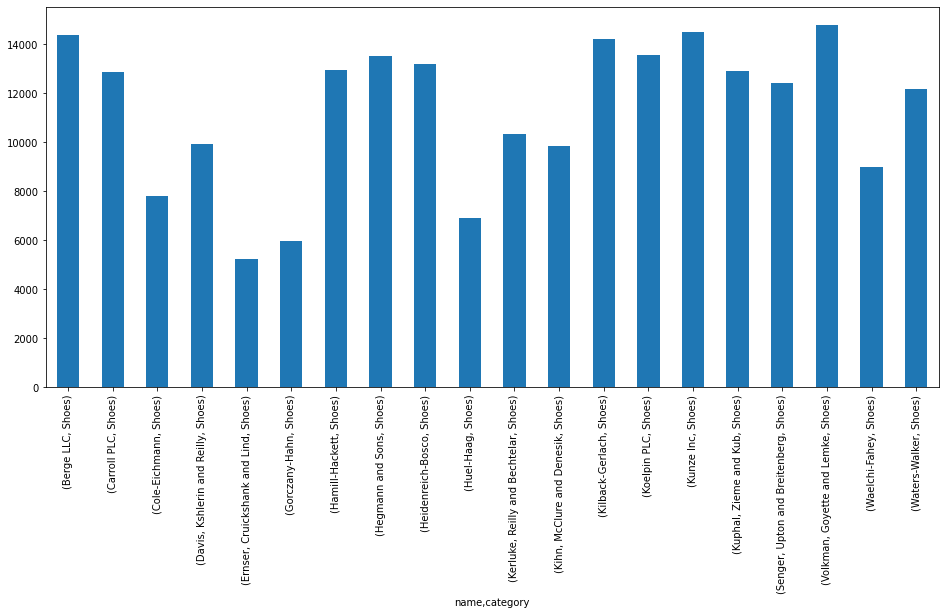

In [85]:
pivotFilter.query("category==['Shoes']")['sum','ext price'].plot(kind='bar',figsize=(16,7))

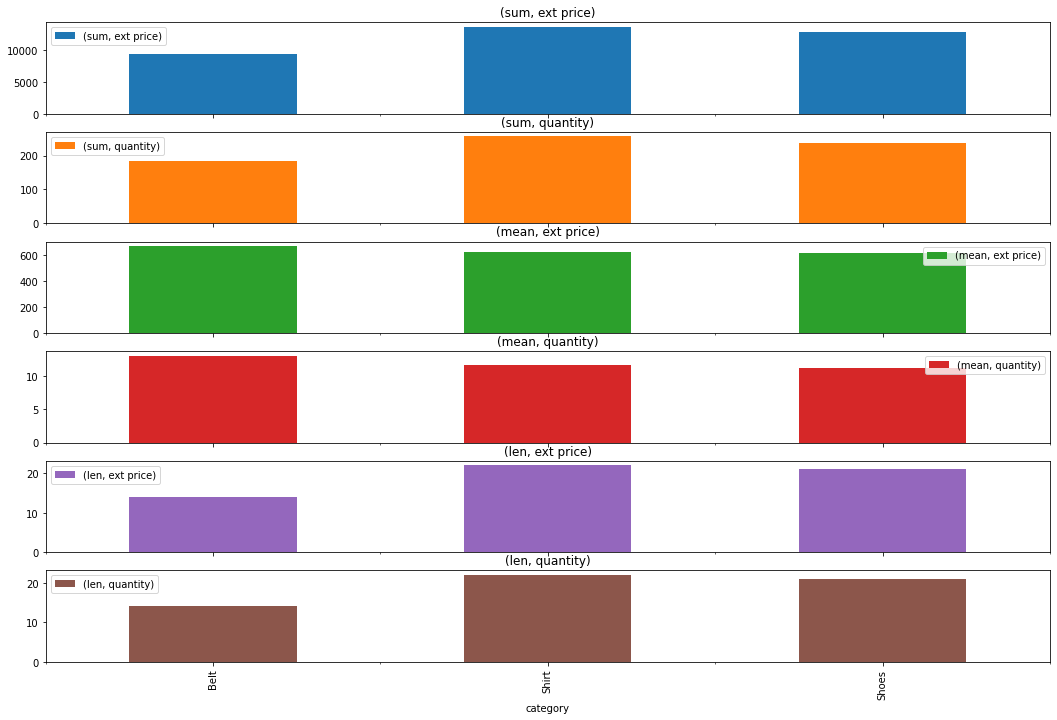

In [86]:
pivotFilter.loc['Carroll PLC'].plot(kind='bar',subplots=True, layout=(20,1), figsize=(18,40))
#save figure!
#plt.savefig('figureSales.png')
plt.show()

In [92]:
# sorting individual column!
 